In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Preparation and EDA

In [2]:
#Load the data
hr_data = pd.read_csv("HR-Employee-Attrition.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Missing values check
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The data does not have missing values so we do not need data cleaning.

In [4]:
#Check the structure of dataset
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The information about the datatypes of all the columns are given.

<AxesSubplot:>

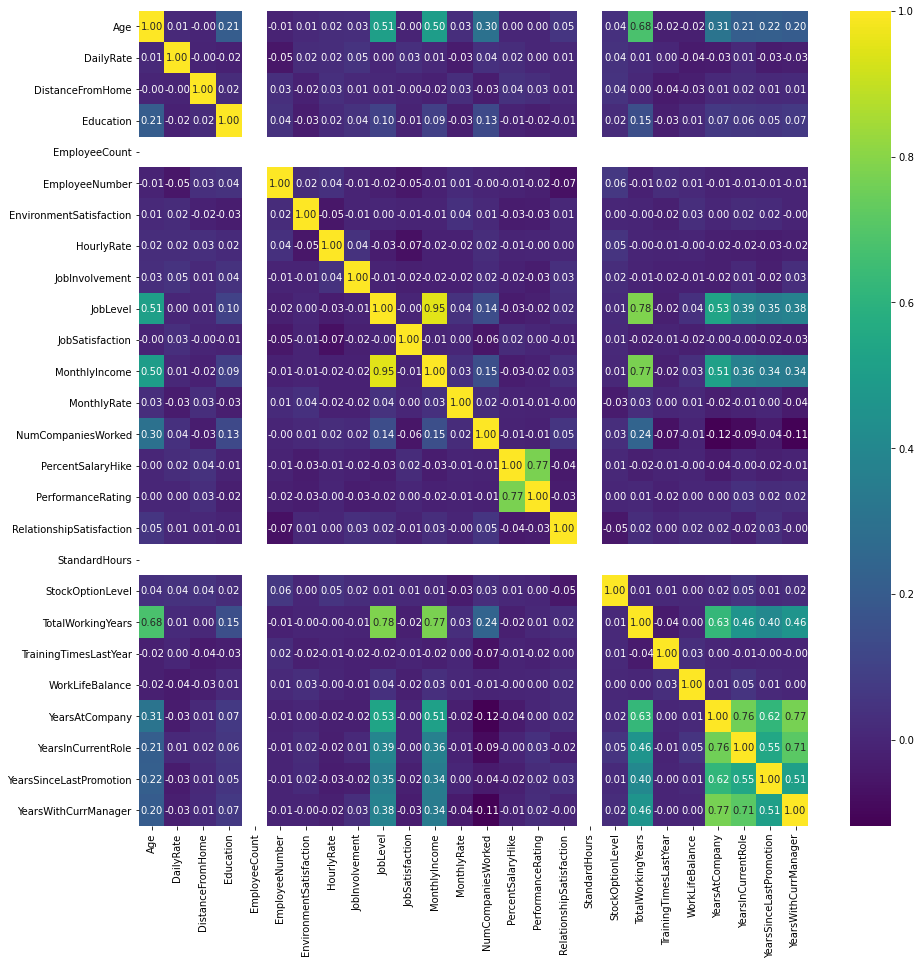

In [5]:
# Correlation
hr_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(hr_data.corr(),annot=True,fmt='.2f',cmap='viridis')

The correation between YearsatCompany and YearsinCurrentRole is highly correlated with 0.76.

(YearsInCurrentRole and YearsAtCompany) vs YearsWithCurrManager is also hgighly correlated with 0.71 and 0.77.

PerformanceRating vs PercentSalaryHike is highgly correlated with 0.77

TotalWorkingYears vs (JobLevel and MonthlyIncome) with 0.78 and 0.77

Others are mildly or very low correlation

In [6]:
# description of data
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observation from above table:-

The Employess age varies between 18 to 60 and average age is 36.

The Daily rate varies between 102 to 1499 with an average of 802.

The total employees are 1470.

The Total Working Years varies between 0 to 40 years respectively.

The outliers may not be present in this dataset so we will not clear the outliers.

### Data Visualisation

<AxesSubplot:xlabel='Age', ylabel='Density'>

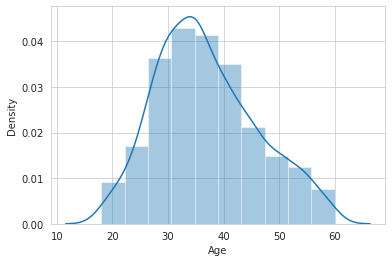

In [7]:
# Distplot of Age.
sns.set_style('whitegrid')
sns.distplot(hr_data['Age'], bins = 10)

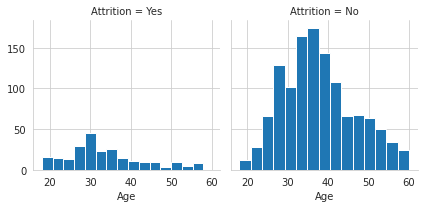

In [8]:
# Age vs Attrition
g = sns.FacetGrid(hr_data, col='Attrition')
g.map(plt.hist, 'Age', bins=15)

The age group between 28 to 38 is less likly to leave the company.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

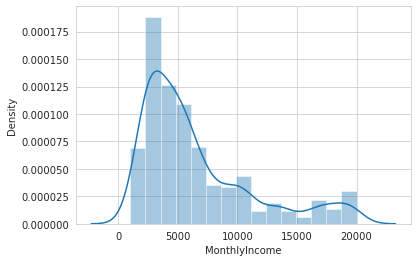

In [9]:
# The distplot of Monthly Income.
sns.distplot(hr_data['MonthlyIncome'], bins = 15)

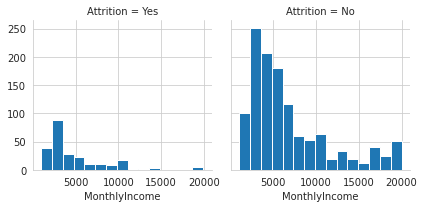

In [10]:
# Monthly Income with Attrition.
sns.set_style('whitegrid')
g = sns.FacetGrid(hr_data, col='Attrition')
g.map(plt.hist, 'MonthlyIncome', bins=15)

The employees having monthly income between 4000 to 10000 will less likely to leave.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

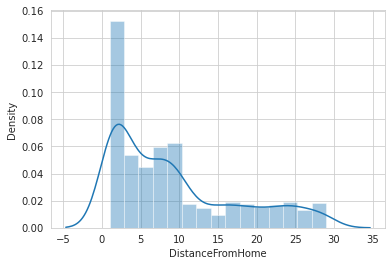

In [11]:
# Distplot of Distance from Home
sns.distplot(hr_data['DistanceFromHome'], bins = 15)

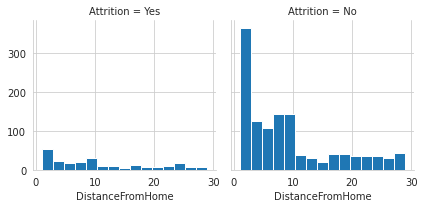

In [12]:
sns.set_style('whitegrid')
g = sns.FacetGrid(hr_data, col='Attrition')
g.map(plt.hist, 'DistanceFromHome', bins=15)

The Employess having less distance from home is less likely to leave.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

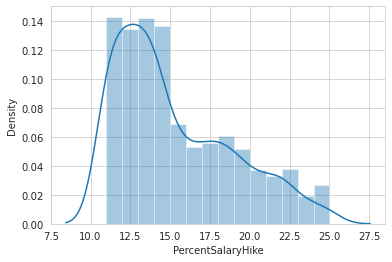

In [13]:
# Distplot of Percent Salary Hike
sns.distplot(hr_data['PercentSalaryHike'])

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

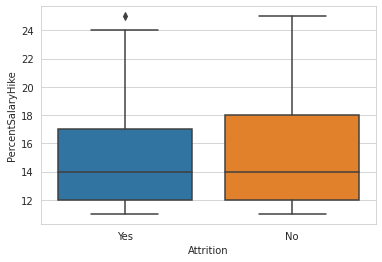

In [14]:
# Boxplot of Attrition vs Percent Salary Hike
sns.boxplot(hr_data['Attrition'],hr_data['PercentSalaryHike'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

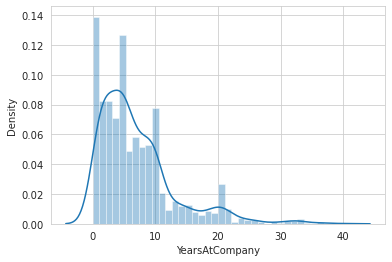

In [15]:
# Distplot of Years At Company
sns.distplot(hr_data['YearsAtCompany'])

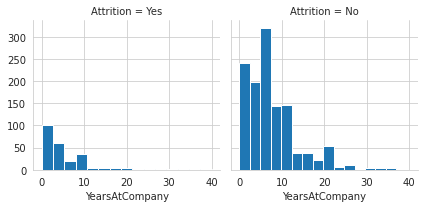

In [16]:
# Years at Company vs Attrition
sns.set_style('whitegrid')
g = sns.FacetGrid(hr_data, col='Attrition')
g.map(plt.hist, 'YearsAtCompany', bins=15)

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

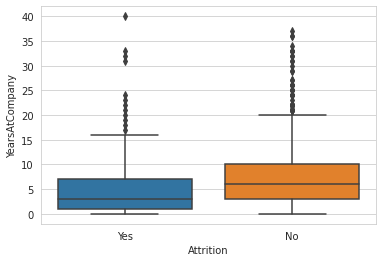

In [17]:
# Boxplot of Attrition vs Years At Company
sns.boxplot(hr_data['Attrition'],hr_data['YearsAtCompany'])

The Higher Years at Company employees are less likely to leave the company. 

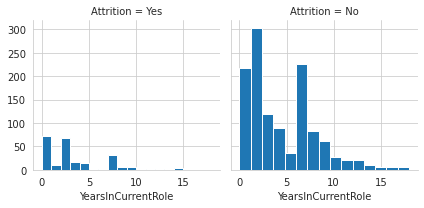

In [18]:
# Years in Current Role vs Attrition
sns.set_style('whitegrid')
g = sns.FacetGrid(hr_data, col='Attrition')
g.map(plt.hist, 'YearsInCurrentRole', bins=15)

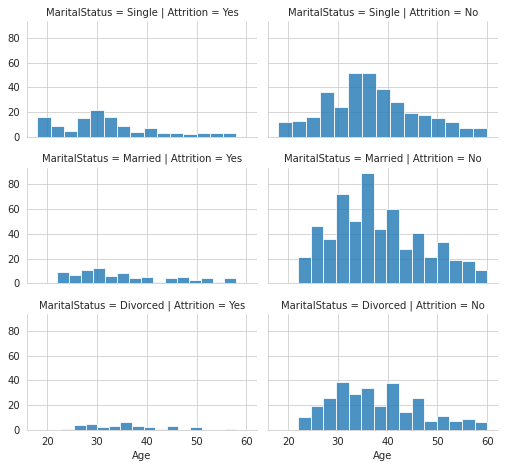

In [19]:
# Maritial Status vs Attrition
grid = sns.FacetGrid(hr_data, col='Attrition', row='MaritalStatus', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=15)
grid.add_legend();

The Maritial Status = Single group is more likely to leave the company.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

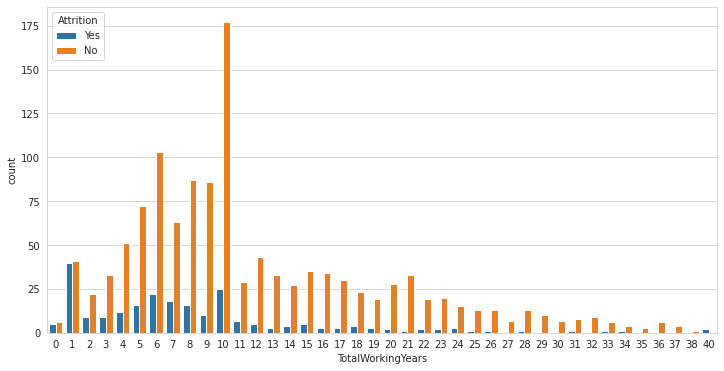

In [20]:
# Total Working Hours vs Attrition
plt.figure(figsize = (12,6))
sns.countplot(hr_data['TotalWorkingYears'], hue = hr_data['Attrition'])

The employees working in between 6 to 10 hrs will less likely to leave the company.

## Model Building

In [65]:
# Taking values in X and y
X=hr_data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=hr_data[['Attrition']].values.ravel()

The X variable contains the all the feature columns and y variable contains the target column.

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Splitting the Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [68]:
# Finding the best model based on accuracy
model=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]
for i in model:
    i.fit(X_train,y_train)
    s=i.score(X_train,y_train)
    pred=i.predict(X_test)
    Ac=accuracy_score(y_test,pred)
    print('Model:-',i,'Accuracy:-',Ac)

Model:- LogisticRegression() Accuracy:- 0.842391304347826
Model:- KNeighborsClassifier() Accuracy:- 0.8342391304347826
Model:- DecisionTreeClassifier() Accuracy:- 0.7282608695652174
Model:- SVC() Accuracy:- 0.842391304347826


Based on the accuracy we select Logistic Regression

In [71]:
# Final Model
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1000, max_iter=10000)

In [70]:
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.857
Test Model accruracy scores: 0.840
--------------------------------------------------------------------------


The result of Logistic Regression having accuracy of 85%. It is good accuracy but will further try to improve the accuracy.

In [72]:
# Creating dummies.
data_dummies=pd.get_dummies(hr_data)
features=data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]
X=features.values
y=data_dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.893
Test Model accruracy scores: 0.894
--------------------------------------------------------------------------


After creating dummies the accuracy improved to 90% approx it is very good score.We will check for overfiting.

In [73]:
# Cross validation score 
cvs=cross_val_score(log_reg,X_train,y_train)
cvs
cvs.mean()


0.8802303578774167

## Conclusion

The best accuracy is provided by LogisticRegression with highest accuracy of 90%.

The Accuracy improvement is done by creating dummies.

The mean score of Cross validation score is 88% that means the model is not overfitted.